In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
# Define the URL
URL = "https://www.uta-net.com/artist/4002/4/"

# Make a GET request to the URL
r = requests.get(URL)

# Write the response content to a file named "home.html"
with open("home.html", "wb") as f:
    f.write(r.content)

In [ ]:
with open("home.html", "r", encoding="utf-8") as file:
    html_content = file.read()
    soup = BeautifulSoup(html_content, "html.parser")

    # Find all the links with class "py-2 py-lg-0" and create absolute URLs
    links = [f"https://www.uta-net.com{link.get('href')}" for link in soup.find_all("a", class_="py-2 py-lg-0")]

# Write the links to a CSV file
with open("links.csv", "w", encoding="utf-8") as file:
    for link in links:
        file.write(f"{link}\n")

In [ ]:
import requests
import time
from datetime import datetime
import os

# Read URLs from links.csv
url_list = []
with open("links.csv", "r", encoding="utf-8") as csv_file:
    # get the number of items in csv
    for url in csv_file:
        clean_url = url.strip()
        url_list.append(clean_url)

# if the html_files folder exsist, Count the number of files in the html_files folder
if os.path.exists("html_files"):
    html_files_count = sum(len(files) for _, _, files in os.walk("html_files"))
else:
    # make directory
    os.mkdir("html_files")
    html_files_count = 0

# Download html files from clean_url
for clean_url in url_list[html_files_count:]:
    print(f"Downloading {clean_url}")
    response = requests.get(clean_url)
    current_time = datetime.now().strftime("%Y%m%d%H%M%S")
    with open(f"./html_files/{current_time}.html", "wb") as html_file:
        html_file.write(response.content)
    time.sleep(5)

In [ ]:
import glob
from bs4 import BeautifulSoup

html_files = glob.glob("html_files/*.html")

kashi_list = []
for html_file in html_files:
    with open(html_file, "r", encoding="utf-8") as file:
        html_content = file.read()
        soup = BeautifulSoup(html_content, "html.parser")
        kashi_area = soup.find("div", {"id": "kashi_area"})
        if kashi_area:
            kashi_text = kashi_area.text
            kashi_list.append(kashi_text)

# Write kashi_text to kashi.csv separated by commas
with open("kashi.csv", "w", encoding="utf-8") as kashi_file:
    for kashi_text in kashi_list:
        kashi_file.write(f"{kashi_text},")

In [ ]:
# Add Japanese part of speech
with open("kashi.csv", "r", encoding="utf-8") as kashi_file:
    combined_string = ",".join(line.strip() for line in kashi_file)

from janome.tokenizer import Tokenizer
import csv

text = combined_string
tokenizer = Tokenizer()
tokens = tokenizer.tokenize(text)

# Prepare data for CSV
rows = [[token.surface, token.part_of_speech] for token in tokens]

# Write to CSV
with open('kashi_janome.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["Token", "Part of Speech"])  # Writing headers
    writer.writerows(rows)

In [ ]:
# Extract any part of speech from kashi_janome.csv
import csv
from janome.tokenizer import Tokenizer

def extract_pos(pos="名詞", output_file="kashi_nouns.csv"):
    pos_list = []
    with open("kashi_janome.csv", "r", newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)  # Skip headers
        for row in reader:
            if pos in row[1]:
                pos_list.append(row[0])

    print(pos_list)

    # save nouns to csv
    with open(output_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows([pos_list])

In [ ]:
extract_pos("名詞", "kashi_nouns.csv")
extract_pos("動詞", "kashi_verbs.csv")
extract_pos("形容詞", "kashi_adjective.csv")

In [114]:
import os
import csv
from wordcloud import WordCloud
from datetime import datetime
import matplotlib.pyplot as plt
import random

def word_cloud(csv_path='kashi_nouns.csv', output_dir="nouns", probability_threshold=0.4, exclude_words=[]):
    nouns = []

    # Read nouns from kashi_nouns.csv
    with open(csv_path, 'r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if random.random() < probability_threshold:
                nouns.extend(row)

    # If nouns is empty, exit
    if not nouns:
        print("No nouns found because of randomness.")
        return

    # Generate word cloud
    wordcloud = WordCloud(
        width=1920,
        height=1200,
        background_color='white',
        font_path='Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf',
        stopwords=exclude_words
    ).generate(' '.join(nouns))

    # Create folder if it doesn't exist
    folder_name = "wordCloud"
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)
    if not os.path.exists(f"{folder_name}/{output_dir}"):
        os.mkdir(f"{folder_name}/{output_dir}")

    # Save word cloud image
    current_time = datetime.now().strftime("%Y%m%d%H%M%S")
    wordcloud.to_file(f"./{folder_name}/{output_dir}/{current_time}.png")

    if not os.path.exists(f"{folder_name}/{output_dir}/dpi_1900"):
        os.mkdir(f"{folder_name}/{output_dir}/dpi_1900")
    # Display word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.savefig(f"./{folder_name}/{output_dir}/dpi_1900/{current_time}.png", dpi=1200)
    plt.axis('off')

No nouns found because of randomness.
No nouns found because of randomness.
No nouns found because of randomness.
No nouns found because of randomness.


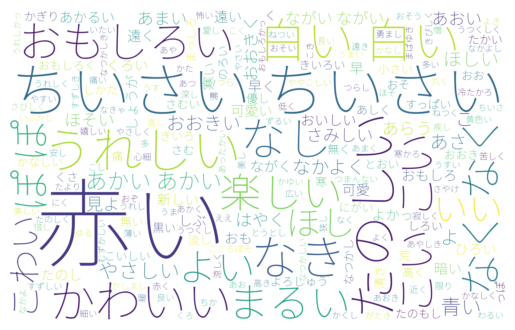

In [121]:
NUM = 5
for _ in range(NUM):
    # You can change arguments
    # word_cloud("kashi_nouns.csv", "nouns", 0.7, ["お", "ん"])
    # word_cloud("kashi_nouns.csv", "nouns", 0.7, ["お", "ん", "さん", "みんな", "こ", "の"])
    word_cloud("kashi_adjective.csv", "adjective", 0.7, ["お", "ん", "ない"])
    # word_cloud("kashi_verbs.csv", "verbs", 0.4, ["お", "ん"])

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_word_count(csv_file_path='kashi_nouns.csv', title="Noun Count", max_words=10, exclude_word=[]):
    # Read the CSV file into a DataFrame
    data_frame = pd.read_csv(csv_file_path, header=None)

    all_words = data_frame.values.flatten()
    all_words = [str(word).strip() for word in all_words if pd.notnull(word)]
    all_words = [word for word in all_words if word not in exclude_word]

    word_counts = pd.Series(all_words).value_counts()
    print(f"Ranking:\n{word_counts[:20]}")
    word_counts = word_counts[:max_words]

    # Create folder if it doesn't exist
    folder_name = "barGraph"
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)

    # Set the font for the plot
    plt.rcParams['font.family'] = "Noto Sans CJK JP"
    word_counts.plot(kind='bar', color='skyblue')
    plt.xticks(rotation=90)
    plt.title(title)
    current_time = datetime.now().strftime("%Y%m%d%H%M%S")
    plt.savefig(f"{folder_name}/{title}_{current_time}.png", dpi=1500)
    plt.tight_layout()
    plt.show()

Ranking:
お       134
さん      110
みんな      80
ん        74
こ        59
の        48
さ        46
ともだち     46
ろ        37
山        37
ぼく       34
こと       32
どこ       31
空        30
日        29
花        28
ねこ       28
君        28
人        27
ホイ       26
Name: count, dtype: int64


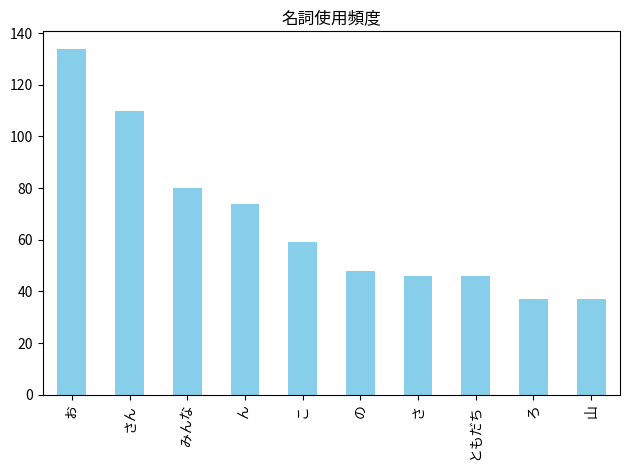

In [94]:
bar_word_count("kashi_nouns.csv", "名詞使用頻度", 10, ["(", ")", ","])

Ranking:
ない       34
ちいさい     24
なく       19
赤い       18
白い       17
ぽ        14
たのしい     13
こい       12
うれしい     12
なき       11
なし       10
あかい      10
かわいい     10
おもしろい     9
楽しい       8
まるい       8
いい        7
よい        7
こわい       7
ほし        7
Name: count, dtype: int64


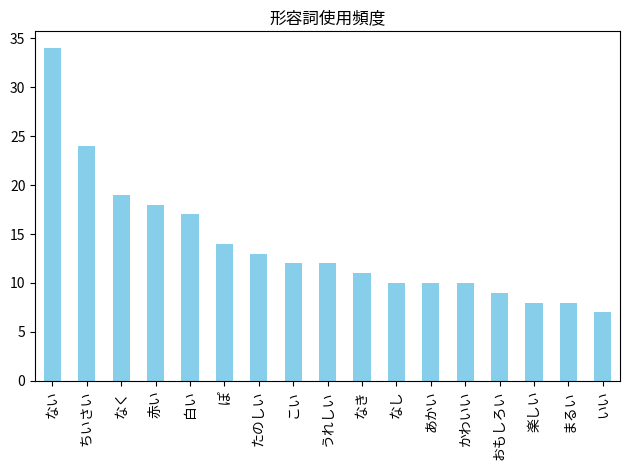

In [119]:
bar_word_count("kashi_adjective.csv", "形容詞使用頻度", 17, [])

Ranking:
た      358
う      171
だ      161
し      109
な       93
き       61
い       61
なっ      53
ず       51
み       48
たら      47
ち       44
ましょ     43
いる      37
せ       34
っ       33
ない      31
ひ       29
ん       28
じ       27
Name: count, dtype: int64


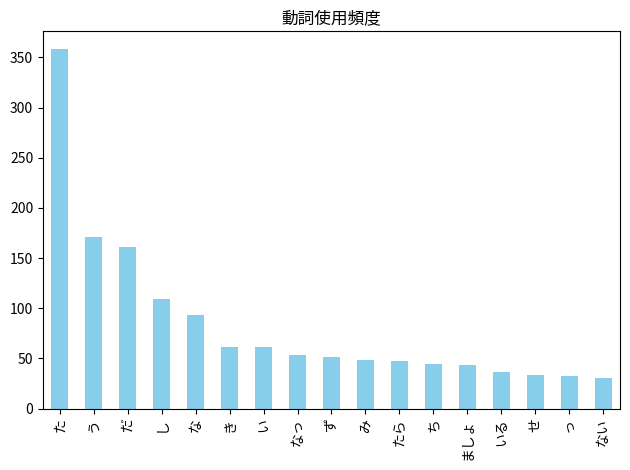

In [87]:
bar_word_count("kashi_verbs.csv", "動詞使用頻度", 17, [])